In [2]:
from utils import *

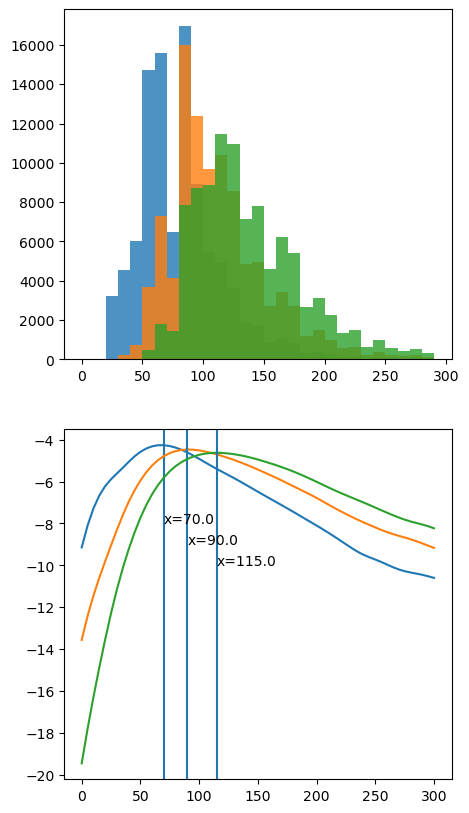

In [116]:
test_1d=glob.glob("../data/rendered/soma/1D/*.npy")
test_2d=glob.glob("../data/rendered/soma/2D/*.npy")
test_rand=glob.glob("../data/rendered/soma/Rand/*.npy")
a_1d=[]
a_2d=[]
a_un=[]
stats_2dr=[]
stats_randr=[]
thre=[50,280]
#devs=[]
#for test in [test_1d, test_2d, test_rand]:
t_r=0.15
for t_r in [0.15]:
    plt.subplots(2,1,figsize=[5,10])
    test = test_rand
    tmp_devs = []
    dists=[[] for i in range(3)]
    for i in range(len(test)):
        vxs = 16*readVXSfromMat(np.load(test[i]), min_sigma=0.5, max_sigma=1,num_sigma=20, threshold_rel=t_r)[0]
        if len(vxs) < 10:
            continue
        dist = distance_matrix(vxs, vxs)
        s_dist = np.sort(dist,axis=1)
        for j in range(3):
            dists[j].extend([s_dist[x,j+1] for x in range(len(vxs))])
    plt.subplot(2,1,1)
    for i in range(3):
        plt.hist(dists[i],bins=range(0,300,10),alpha=0.8)
        #links = generateLinks(vxs*16, thre=thre, plot=0)
        #angles = getAngle(vxs, links)
        #a.extend(angles)
        #tmp_devs.append(calAngleDev(angles))
    #devs.append(tmp_devs)
    plt.subplot(2,1,2)
    for i in range(3):
        a = np.array(dists[i]).reshape(-1, 1)
        kde = KernelDensity(kernel='gaussian', bandwidth=10).fit(a)
        s = np.linspace(0,300,61)
        e = kde.score_samples(s.reshape(-1,1))
        #ax[1, 0].fill(X_plot[:, 0], np.exp(e), fc="#AAAAFF")
        plt.plot(s, e)
        l_max = argrelextrema(e, np.greater)[0]
        plt.axvline(x=s[l_max[0]])
        plt.text(s[l_max[0]],-8-i,"x="+str(s[l_max[0]]))

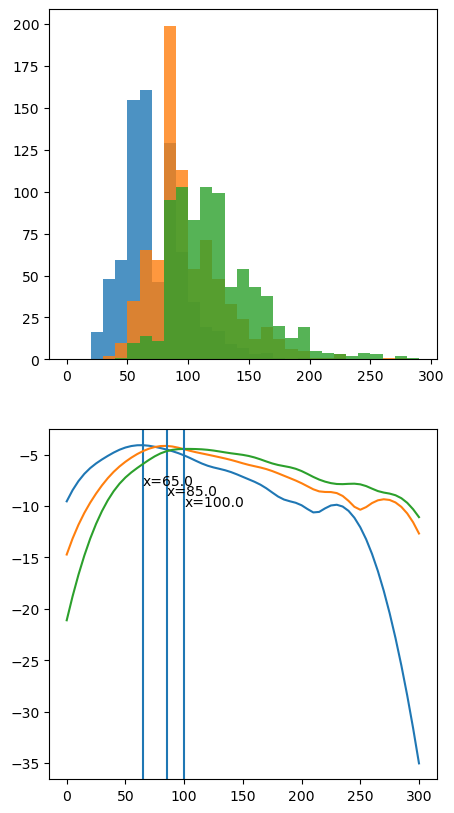

In [118]:
for t_r in [0.15]:
    plt.subplots(2,1,figsize=[5,10])
    test = test_2d
    tmp_devs = []
    dists=[[] for i in range(3)]
    for i in range(len(test)):
        vxs = 16*readVXSfromMat(np.load(test[i]), min_sigma=0.5, max_sigma=1,num_sigma=20, threshold_rel=t_r)[0]
        if len(vxs) < 10:
            continue
        dist = distance_matrix(vxs, vxs)
        s_dist = np.sort(dist,axis=1)
        for j in range(3):
            dists[j].extend([s_dist[x,j+1] for x in range(len(vxs))])
    plt.subplot(2,1,1)
    for i in range(3):
        plt.hist(dists[i],bins=range(0,300,10),alpha=0.8)
        #links = generateLinks(vxs*16, thre=thre, plot=0)
        #angles = getAngle(vxs, links)
        #a.extend(angles)
        #tmp_devs.append(calAngleDev(angles))
    #devs.append(tmp_devs)
    plt.subplot(2,1,2)
    for i in range(3):
        a = np.array(dists[i]).reshape(-1, 1)
        kde = KernelDensity(kernel='gaussian', bandwidth=10).fit(a)
        s = np.linspace(0,300,61)
        e = kde.score_samples(s.reshape(-1,1))
        #ax[1, 0].fill(X_plot[:, 0], np.exp(e), fc="#AAAAFF")
        plt.plot(s, e)
        l_max = argrelextrema(e, np.greater)[0]
        plt.axvline(x=s[l_max[0]])
        plt.text(s[l_max[0]],-8-i,"x="+str(s[l_max[0]]))

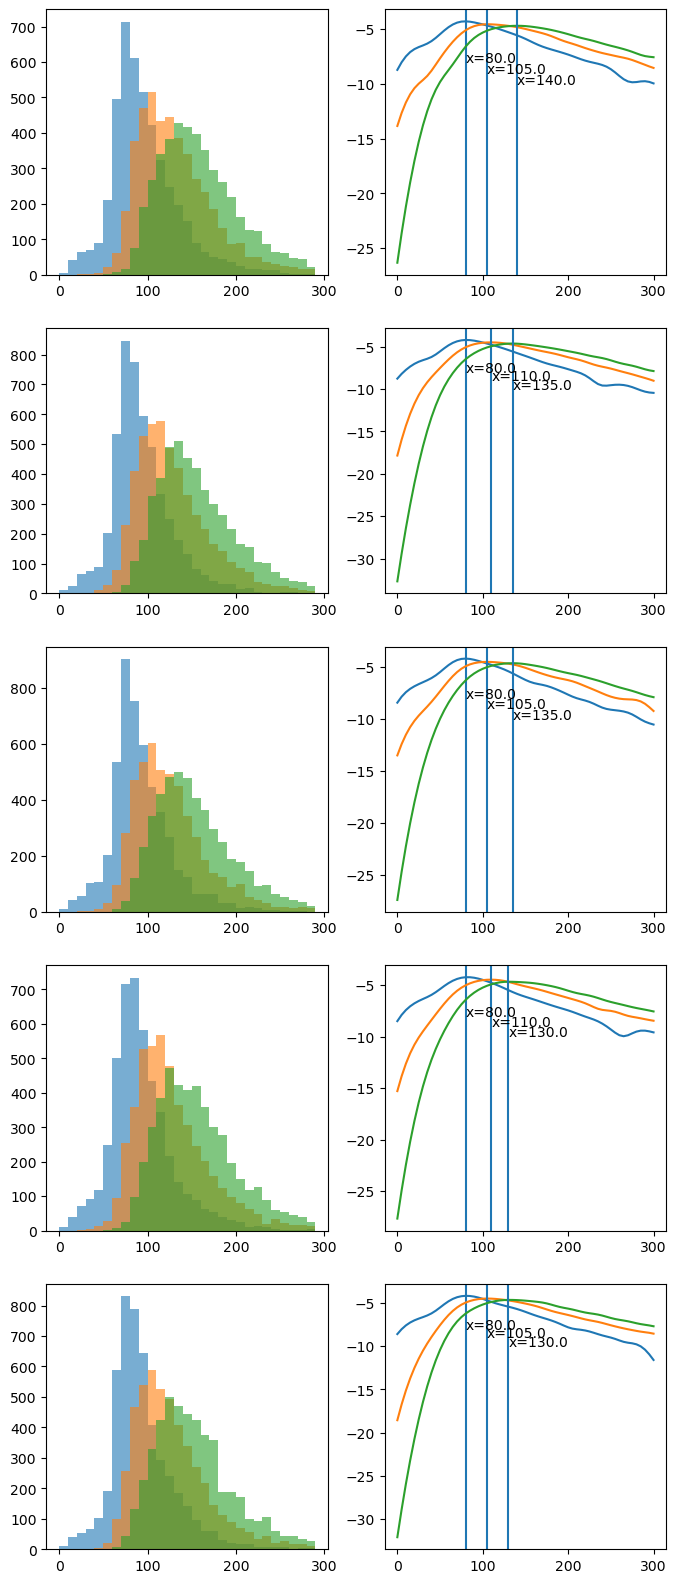

In [38]:
plt.subplots(5,2,figsize=[8,20])
loss=10
## record the sim parameters here !!! 9/7/2024
np.random.seed(1027)
for t in range(5):
    dists=[[] for i in range(3)]
    for i in range(100):
        vxs = simRandD(64*16,d=65,n=int(np.random.normal(48.8,15.6)))
        if len(vxs) > 3:
            vxs = jitter(vxs, rand=20, loss=np.min([len(vxs)-2,np.random.randint(loss)]), noise=np.random.randint(10))
        if len(vxs) > 3:
            dist = distance_matrix(vxs, vxs)
            s_dist = np.sort(dist,axis=1)
            for j in range(3):
                dists[j].extend([s_dist[x,j+1] for x in range(len(vxs))])

    plt.subplot(5,2,t*2+1)
    for i in range(3):
        plt.hist(dists[i],bins=range(0,300,10),alpha=0.6)  
    plt.subplot(5,2,t*2+2)
    for i in range(3):
        a = np.array(dists[i]).reshape(-1, 1)
        kde = KernelDensity(kernel='gaussian', bandwidth=10).fit(a)
        s = np.linspace(0,300,61)
        e = kde.score_samples(s.reshape(-1,1))
        #ax[1, 0].fill(X_plot[:, 0], np.exp(e), fc="#AAAAFF")
        plt.plot(s, e)
        l_max = argrelextrema(e, np.greater)[0]
        plt.axvline(x=s[l_max[0]])
        plt.text(s[l_max[0]],-8-i,"x="+str(s[l_max[0]])) 

# Red blood cell

In [5]:
def saveNCrop(img_path, xys, grid_size=64, ratio=10, offset=5, plot=1):
    # offset between img and loc
    # img = cv2.imread(img_path)
    loc = img_path[:-3] + "txt"
    smlm = pd.read_table(loc, header=0)
    # xyz = smlm[["Xc","Yc","Zc"]]
    for xy in xys:
        cropped = smlm.loc[
            (xy[1] / (ratio + offset) <= smlm["Xc"])
            & (smlm["Xc"] <= ((xy[1] + grid_size + offset)) / ratio)
            & (xy[0] / (ratio + offset) <= smlm["Yc"])
            & (smlm["Yc"] <= (xy[0] + grid_size + offset) / ratio)
        ]
        cropped.loc[:, "Xc"] = cropped["Xc"] * ratio - xy[1] - offset
        cropped.loc[:, "Yc"] = cropped["Yc"] * ratio - xy[0] - offset
        sub_path = (
            "/".join(img_path.split("/")[:-1])
            + "/sub_"
            + img_path.split("/")[-1][:-4]
            + "_x"
            + str(xy[1])
            + "_y"
            + str(xy[0])
            + "_grid"
            + str(grid_size)
        )
        #cropped.to_csv(sub_path + ".txt", index=False)
        xc = np.array(cropped["Xc"].tolist()).astype(np.int32)
        yc = np.array(cropped["Yc"].tolist()).astype(np.int32)
        img = grid2D(
            np.zeros([grid_size, grid_size], dtype=np.int32),
            xc,
            yc,
            grid_size,
            grid_size,
            len(xc),
        )
        np.save(sub_path,img)
        if plot==1:
            g = cv2.getGaussianKernel(3, sigma=1)
            kernel = g * g.T
            nimg = scipy.signal.fftconvolve(img, kernel, mode="same")
            plt.imshow(nimg.T)
            plt.xticks([], [])
            plt.yticks([], [])
            plt.savefig(
                sub_path + ".png",
                facecolor=None,
                edgecolor=None,
                bbox_inches="tight",
                pad_inches=0.0,
            )
            plt.close('all')

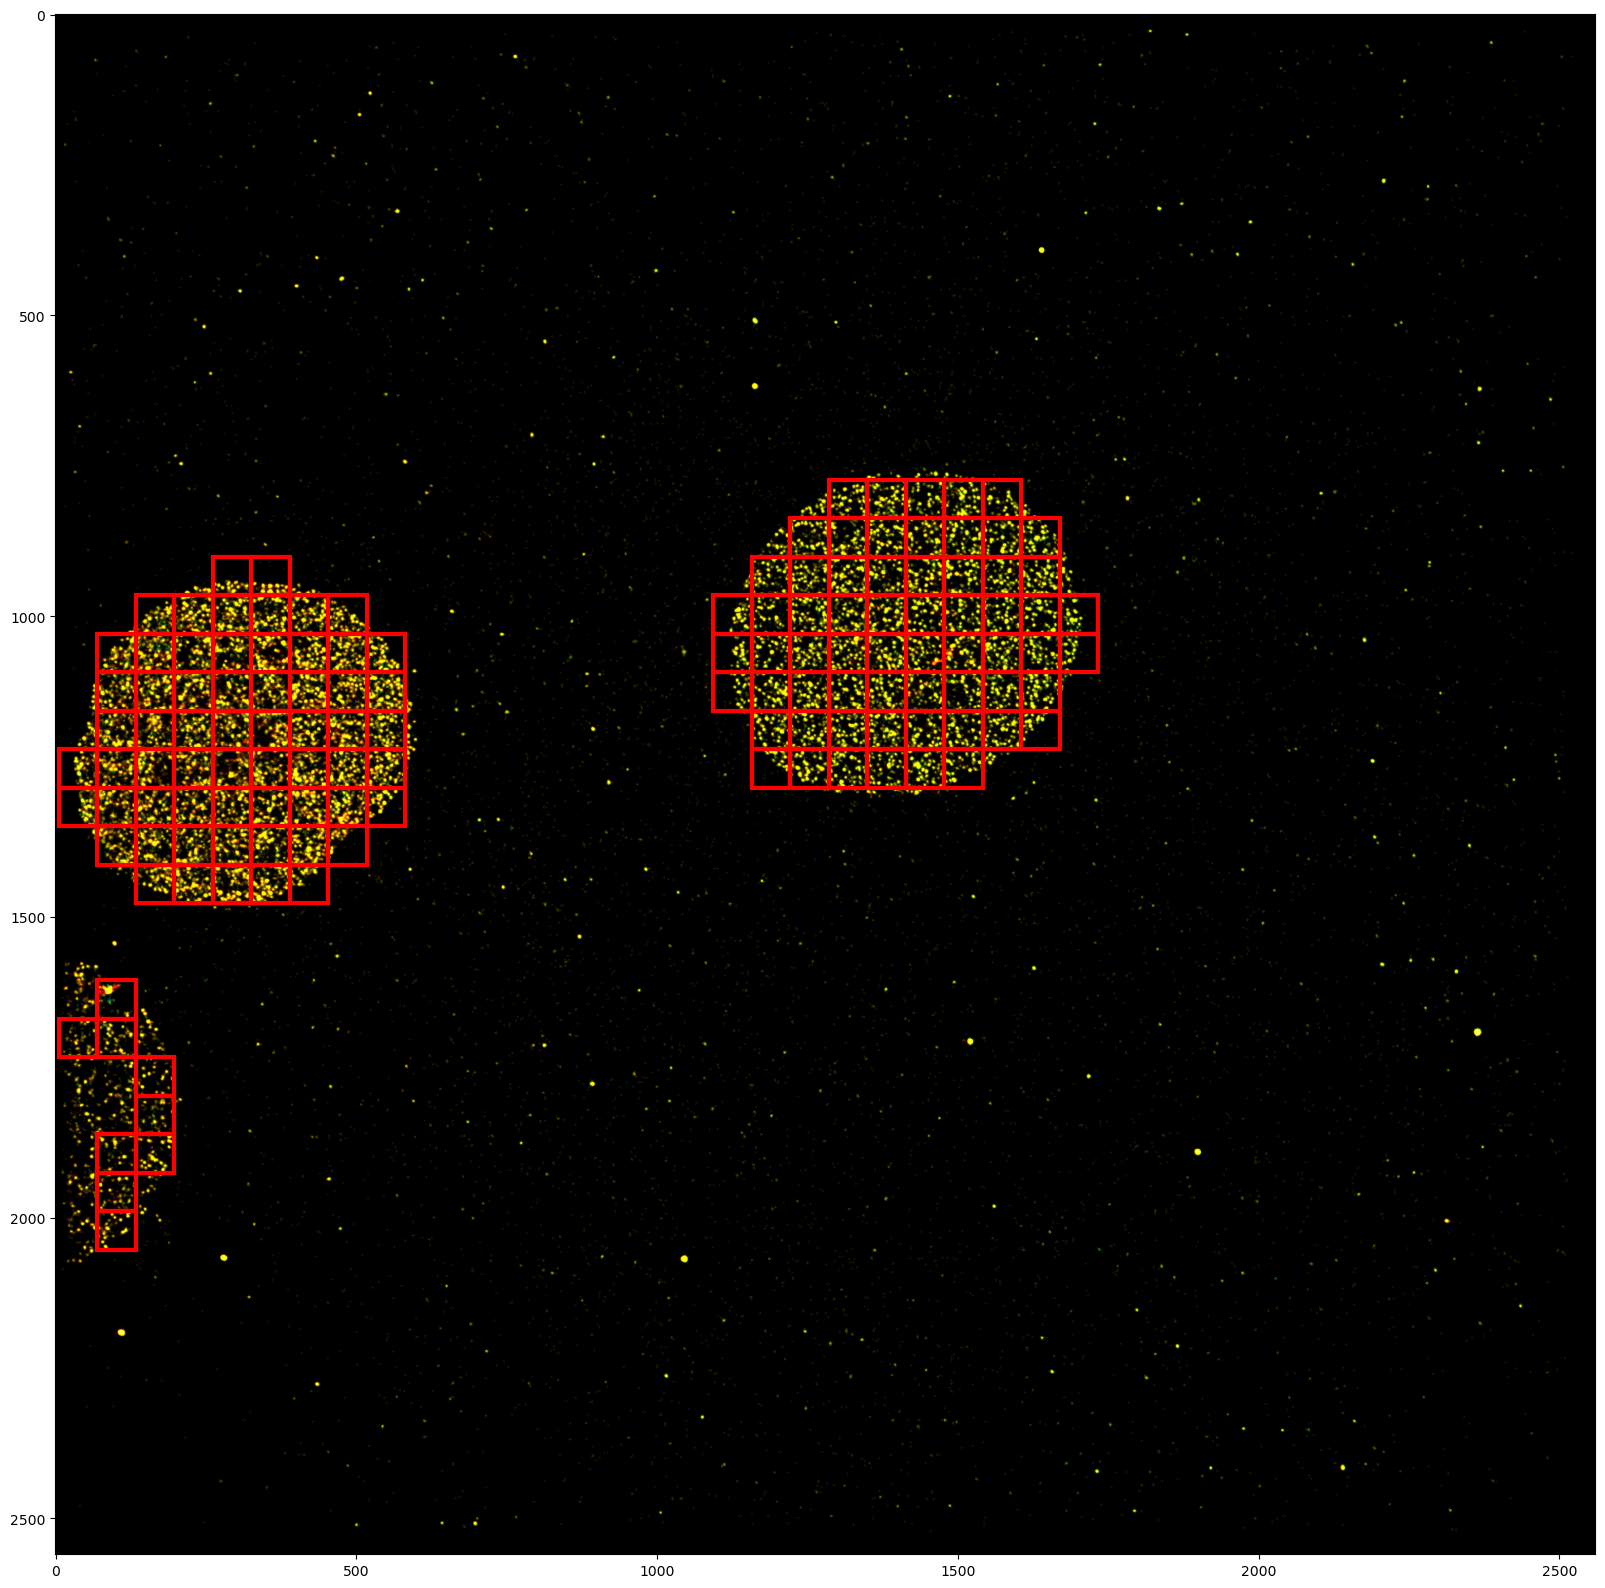

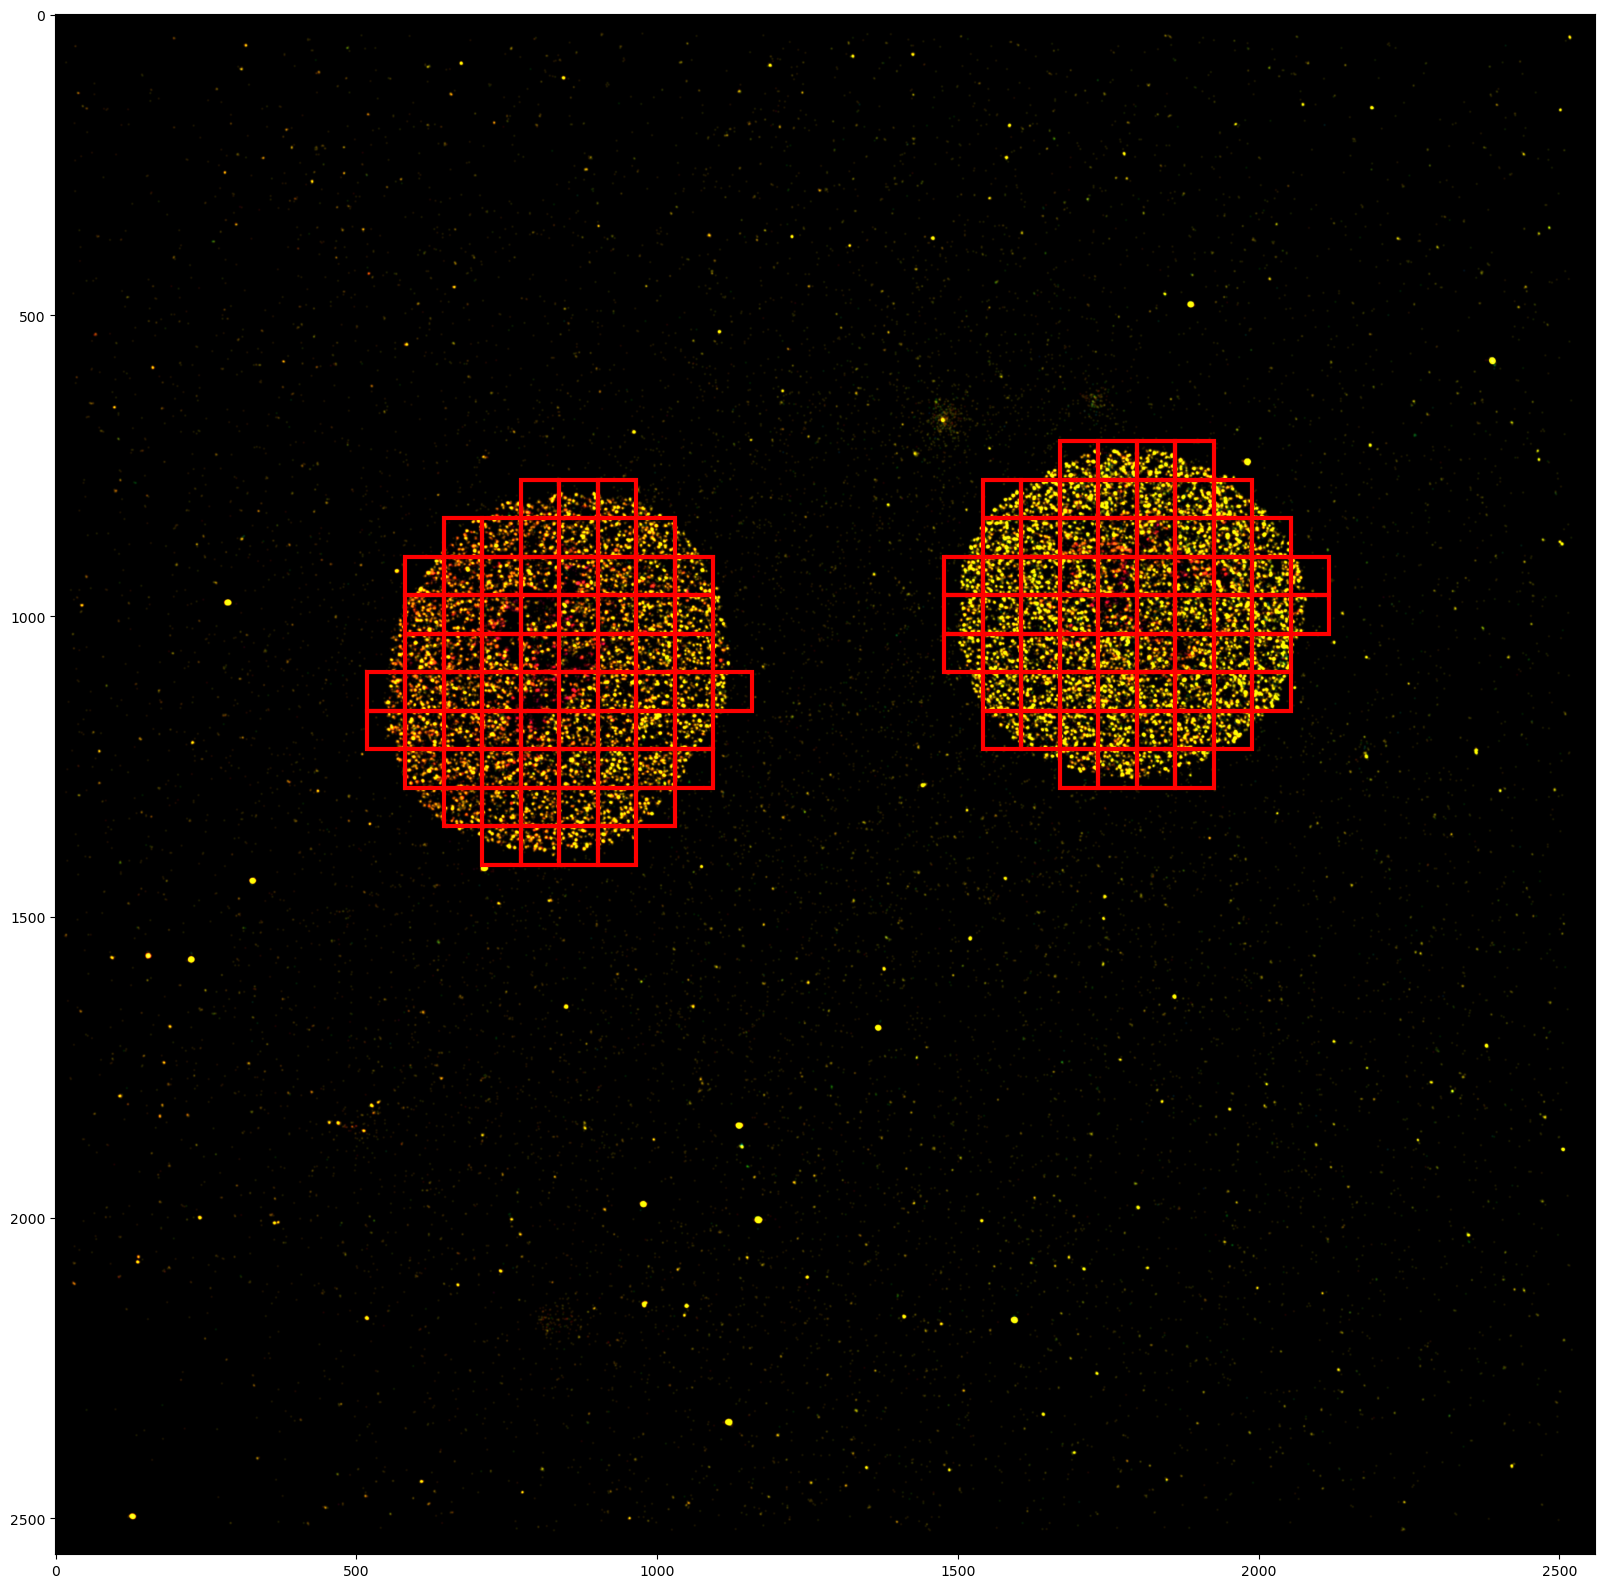

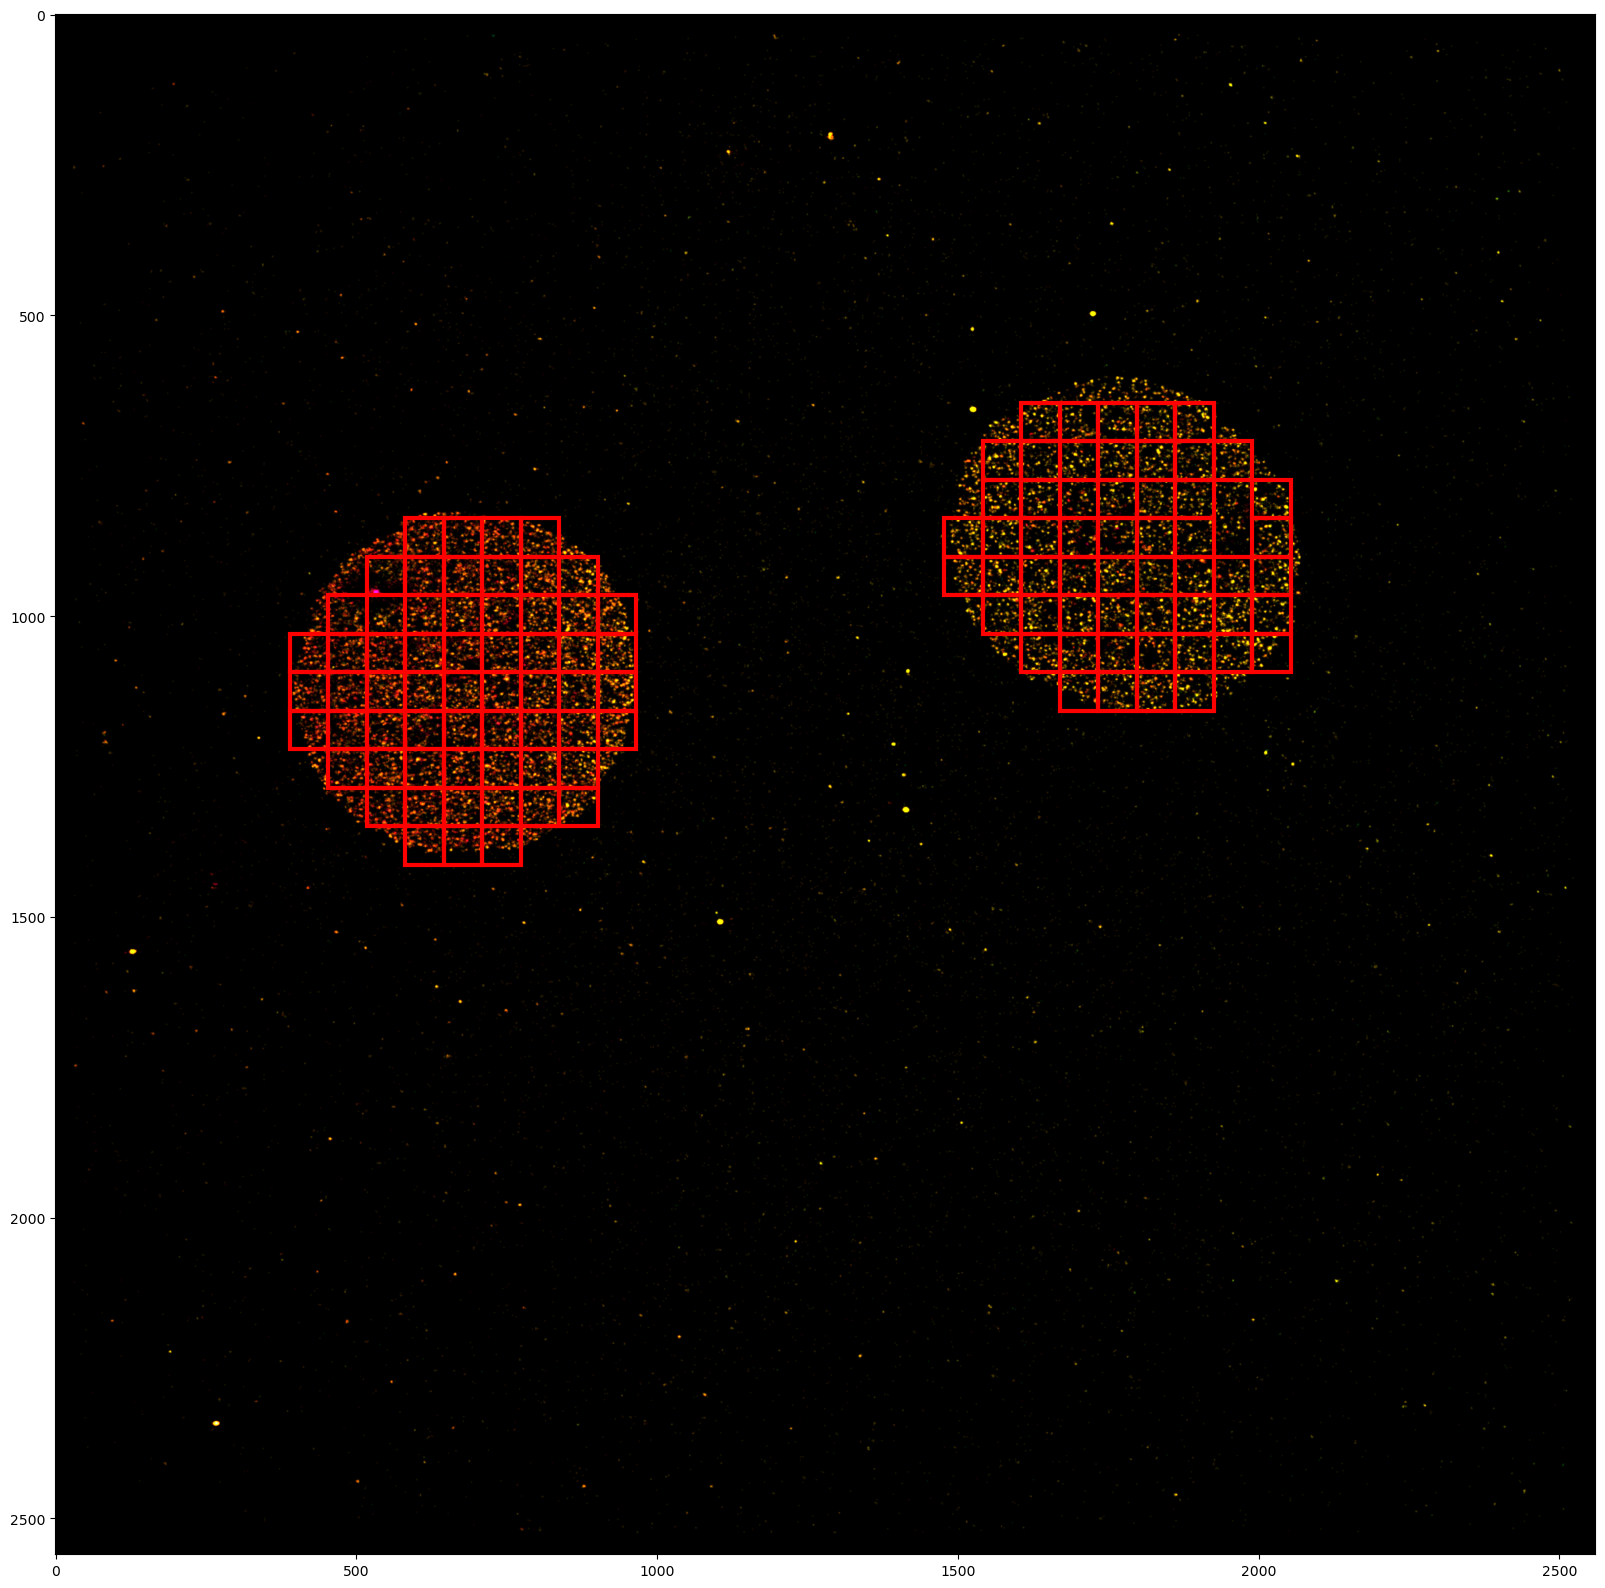

In [6]:
for pi in range(3):
    img_path="../data/rendered/RBC/"+str(pi+1)+".png"
    x0, y0, sx, sy=0, 0, 2560, 2560

    pad = 5
    grid_size = 64

    img = cv2.imread(img_path)
    plt.figure(figsize=[20,20])
    plt.imshow(img[x0:x0+sx,y0:y0+sy])
    xys=[]
    for i in range(pad,sx-pad,64):
        for j in range(pad,sy-pad,64):
            x = i
            y = j
            if np.sum(img[x0+x:x0+64+x,y0+y:y0+y+64]) > 200000:
                xys.append([x0+x, y0+y])
                plt.gca().add_patch(Rectangle((y,x),64,64,linewidth=3,edgecolor="red",facecolor='none'))
            

    saveNCrop(img_path, xys, plot=0)

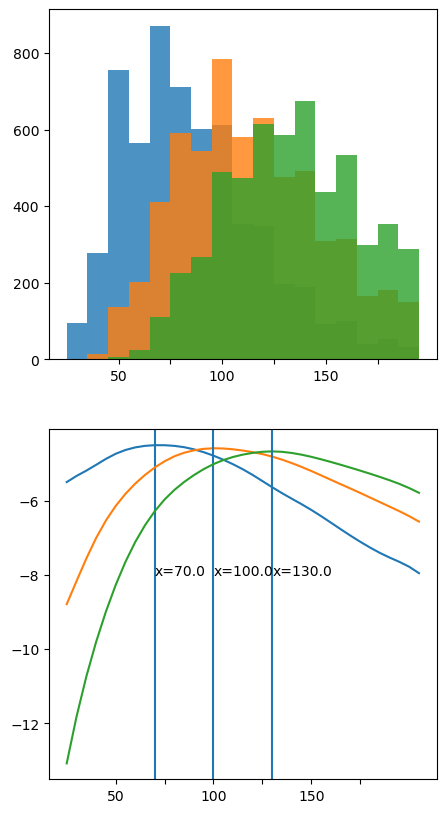

In [113]:
t_r = 0.15
bin_low = 25
bin_high = 205
bin_size = 10
p_size = 16
for i in range(1):
    plt.subplots(2,1,figsize=[5,10])
    dists=[[] for x in range(3)]
    subs = glob.glob("../data/rendered/RBC/sub_"+str(i+1)+"*.npy")
    for sub in subs:
        mat = np.load(sub)
        vxs = p_size*readVXSfromMat(mat, min_sigma=0.5,max_sigma=1,num_sigma=20, threshold_rel=t_r)[0]
        if len(vxs) < 5:
            continue
        #print(len(vxs))
        #print(sub)
        dist = distance_matrix(vxs, vxs)
        s_dist = np.sort(dist,axis=1)        
        for j in range(3):
            dists[j].extend([s_dist[x,j+1] for x in range(len(vxs))])
    ax = plt.subplot(211)
    ticks = [50+x*25 for x in range(6)]
    for j in range(3):
        plt.hist(dists[j],bins=range(bin_low,bin_high,bin_size),alpha=0.8)
        #dists[j].extend([s_dist[x,j+1] for x in range(len(vxs))])
    
    ax.set_xticks(ticks,[str(x) if x%50==0 else "" for x in ticks ])
    ax = plt.subplot(212)
    for j in range(3):
        a = np.array(dists[j]).reshape(-1, 1)
        kde = KernelDensity(kernel='gaussian', bandwidth=10).fit(a)
        s = np.linspace(bin_low,bin_high,int(2*(bin_high-bin_low)/bin_size)+1)
        e = kde.score_samples(s.reshape(-1,1))
        #ax[1, 0].fill(X_plot[:, 0], np.exp(e), fc="#AAAAFF")
        plt.plot(s, e)
        l_max = np.argmax(e)
        plt.axvline(x=s[l_max])
        plt.text(s[l_max],-8-i,"x="+str(s[l_max]))
    ax.set_xticks(ticks,[str(x) if x%50==0 else "" for x in ticks])

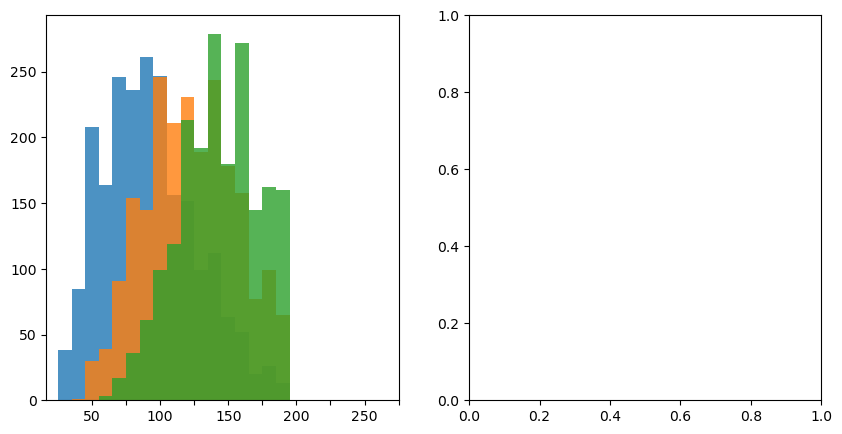

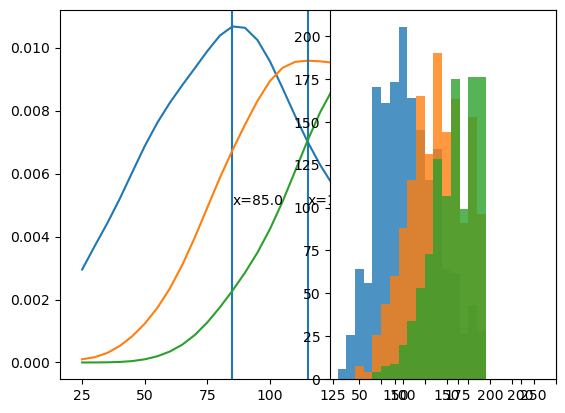

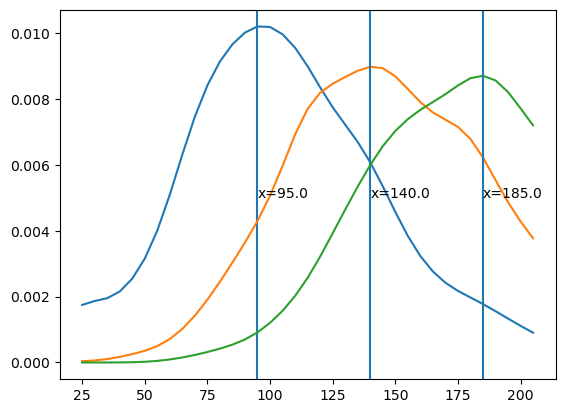

In [115]:
bounds = [[[950, 1500,50,600],[750,1300,1100,1700]],[[800,1400,550,1100],[700,1300,1500,2100]],[[800,1400,400,1000],[600,1150,1500,2100]]]
offset = 5
ratio = 10
for t_r in [0.15]:#[0,0.05,0.1,0.15,0.2]:
    for pi in range(1):
        img_path="../data/rendered/RBC/"+str(pi+1)+".png"
        img = cv2.imread(img_path)
        # plt.figure(figsize=[20,20])
        # plt.imshow(img)#[x0:x1,y0:y1])

        loc = img_path[:-3] + "txt"
        smlm = pd.read_table(loc, header=0)
        # for ci in range(2):
        #     x0, x1, y0, y1=bounds[pi][ci]
        #     sx = x1-x0
        #     sy = y1-y0
        #     plt.gca().add_patch(Rectangle((y0,x0),sy,sx,linewidth=3,edgecolor="red",facecolor='none'))
        plt.subplots(1,2,figsize=[10,5])

        for ci in range(2):
            dists=[[] for x in range(3)]
            #x0, x1, y0, y1=bounds[pi][ci]
            y0, y1, x0, x1=bounds[pi][ci]
            sx = x1-x0
            sy = y1-y0
            cropped = smlm.loc[
                ((x0 + offset) / ratio  <= smlm["Xc"])
                & (smlm["Xc"] <= (x1 + offset) / ratio)
                & ((y0 + offset)/ ratio  <= smlm["Yc"])
                & (smlm["Yc"] <= (y1 + offset) / ratio)
            ]
            
            cropped.loc[:, "Xc"] = cropped["Xc"] * ratio - x0 - offset
            cropped.loc[:, "Yc"] = cropped["Yc"] * ratio - y0 - offset
            xc = np.array(cropped["Xc"].tolist()).astype(np.int32)
            yc = np.array(cropped["Yc"].tolist()).astype(np.int32)
            g_img = grid2D(
                np.zeros([sx, sy], dtype=np.int32),
                xc,
                yc,
                sx,
                sy,
                len(xc),
            )
            ax = plt.subplot(1,2,ci+1)
            #plt.imshow(g_img)
            vxs = p_size*readVXSfromMat(g_img, min_sigma=0.5,max_sigma=1,num_sigma=20, threshold_rel=t_r)[0]
            dist = distance_matrix(vxs, vxs)
            s_dist = np.sort(dist,axis=1)  
            for j in range(3):
                dists[j].extend([s_dist[x,j+1] for x in range(len(vxs))])
            #saveNCrop(img_path, xys, plot=0)
            ax = plt.subplot(1,2,ci+1)
            ticks = [50+x*25 for x in range(10)]
            for j in range(3):
                plt.hist(dists[j],bins=range(bin_low,bin_high,bin_size),alpha=0.8)#,density=True)
                #dists[j].extend([s_dist[x,j+1] for x in range(len(vxs))])
            plt.figure()
            for j in range(3):
                a = np.array(dists[j]).reshape(-1, 1)
                kde = KernelDensity(kernel='gaussian', bandwidth=10).fit(a)
                s = np.linspace(bin_low,bin_high,int(2*(bin_high-bin_low)/bin_size)+1)
                e = kde.score_samples(s.reshape(-1,1))
                #ax[1, 0].fill(X_plot[:, 0], np.exp(e), fc="#AAAAFF")
                plt.plot(s, np.exp(e))
                l_max = np.argmax(e)
                plt.axvline(x=s[l_max])
                plt.text(s[l_max],0.005,"x="+str(s[l_max]))
            ax.set_xticks(ticks,[str(x) if x%50==0 else "" for x in ticks])


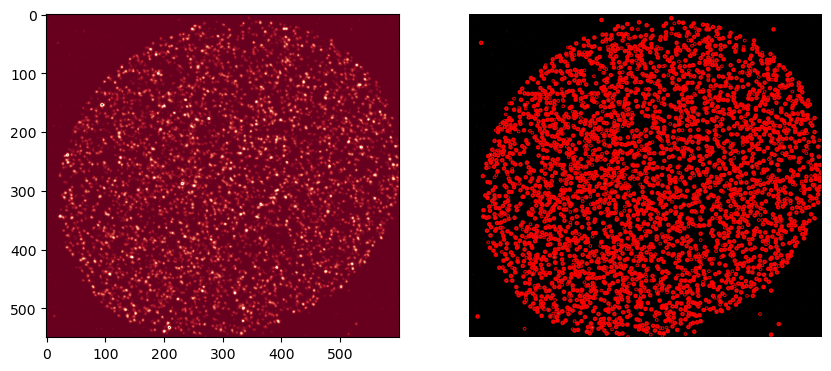

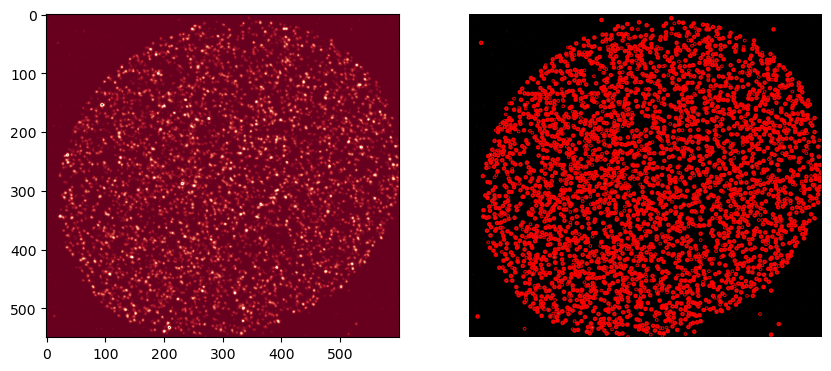

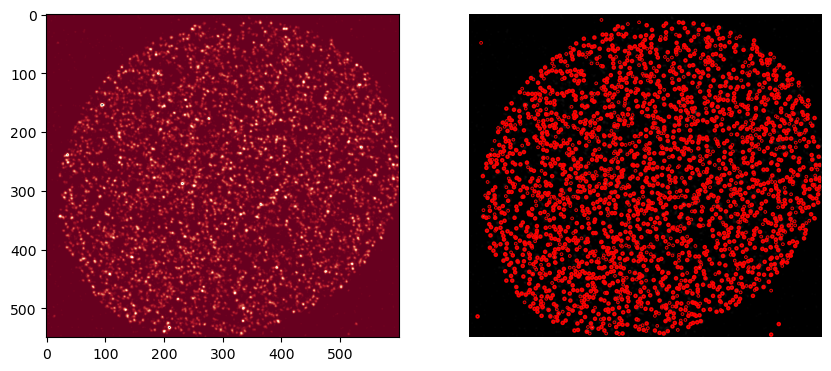

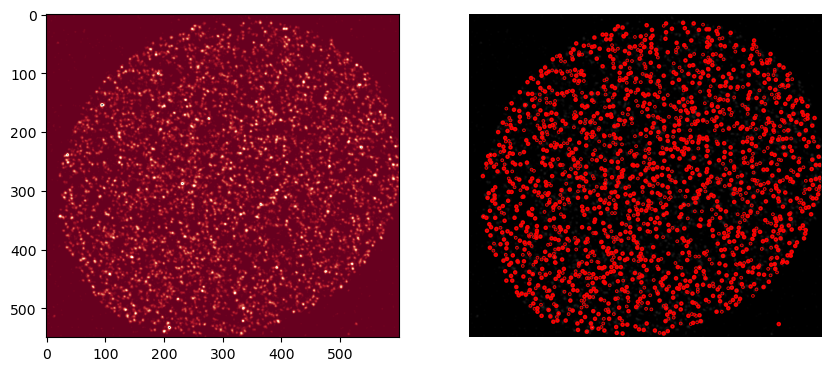

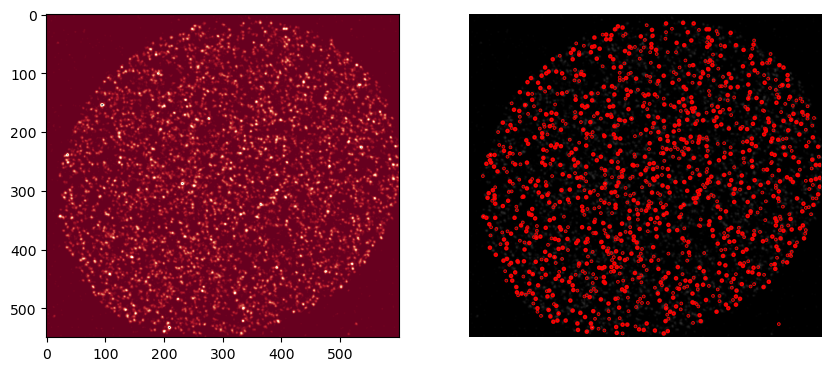

In [107]:
for t_r in [0,0.05,0.1,0.15,0.2]:
    readVXSfromMat(g_img.T, plot=1, min_sigma=0.5,max_sigma=1,num_sigma=20, threshold_rel=t_r)[0]

In [103]:
t_r

0.2

In [101]:
def readVXSfromMat(mat, grid_size=64, plot=0, **cluster_args):
    img = renderImg(mat, k_size=5, sigma=1)
    vxs, r = blob(img, **cluster_args)
    if plot==1:
        plt.subplots(1,2,figsize=[10,5])
        plt.subplot(121)
        plt.imshow(img, cmap="RdGy")    
        ax = plt.subplot(122)
        plt.imshow(img)   
        for i in range(len(vxs)):
            c = plt.Circle((vxs[i,0], vxs[i,1]), r[i], color="red", linewidth=2, fill=False)
            ax.add_patch(c)
        ax.set_axis_off()
    return vxs, r

In [53]:
np.exp(e)

array([0.00443861, 0.0050856 , 0.00549732, 0.00563308, 0.00561137,
       0.00561416, 0.00578804, 0.00620887, 0.00687786, 0.00769784,
       0.00846362, 0.0089412 , 0.00902561, 0.00886073, 0.00879939,
       0.00918299, 0.01006994, 0.01113863, 0.01189331, 0.01203114,
       0.0116612 , 0.01120453, 0.01108715, 0.01147098, 0.01218479,
       0.01285697, 0.01313468, 0.01285159, 0.01207576, 0.01105821,
       0.01012817, 0.00955733, 0.00942215, 0.0095406 , 0.00956319,
       0.00919743, 0.00841027, 0.00744217, 0.00662454, 0.00615936,
       0.00602317, 0.00602753, 0.00595865, 0.0056978 , 0.00525962,
       0.00474661, 0.00427288, 0.0039115 , 0.00367597, 0.00352233,
       0.00337145, 0.00315344, 0.00285139, 0.00251195, 0.00221334,
       0.00201274, 0.00190983, 0.00185287, 0.00178111, 0.00166594,
       0.00151793])

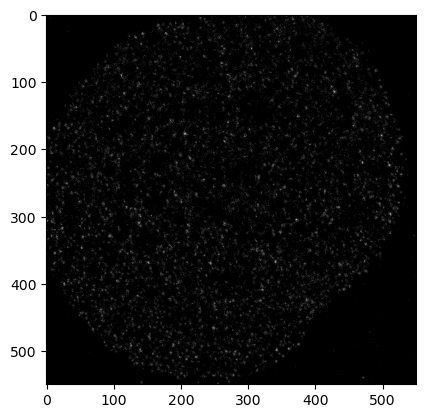

In [45]:
plt.imshow(g_img)